# 퍼셉트론
가장 단순한 형태의 신경망이라 히든 레이어 없이 싱글 레이어로만 구성
# 경사하강법
딥러닝의 뼈대라고 생각해도 된다

# 실습 : 폐암 수술 환자의 생존율 예측

In [2]:
# 딥러닝을 구동하는 데 필요한 케라스 함수 호출
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리 불러오기
import numpy as np
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분
np.random.seed(3)
tf.random.set_seed(3)

# 준비된 수술 환자 데이터를 불러오기
Data_set = np.loadtxt(r'C:\Users\Owner\Desktop\khh\SeoulICT\220313\deepLearning_dataset\ThoraricSurgery.csv', delimiter=",")

# 환자의 기록과 수술 결과를 X와 Y로 구분하여 저장
X = Data_set[:, 0:17]
Y = Data_set[:, 17]

# 딥러닝 구조를 결정(모델을 설정하고 실행)
model = Sequential()    # model이라는 이름의 레이아웃 만듦
model.add(Dense(30, input_dim=17, activation='relu'))    # model이라는 레이아웃에 층을 만듦 input_dim은 입력하는 X값 의미
model.add(Dense(1, activation='sigmoid'))    # model이라는 레이아웃에 층을 만듦

# 딥러닝 실행
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  # loss : 예측값과 실제값의 비교, binary_crossentropy라는 평가지표를 쓰겠다는 의미
  # optimizer : 성능을 높이기 위한 일종의 하이퍼 파라미터 adam 쓸지, nadam쓸지
model.fit(X, Y, epochs=100, batch_size=10)    # 모델 레이아웃을 100번 돌릴거다. 한번에 10번씩 돌린다

print("\n Accuracy : %.4f"%(model.evaluate(X,Y)[1]))

Epoch 1/100
47/47 [==============================] - 0s 751us/step - loss: 0.6482 - accuracy: 0.8128
Epoch 2/100
47/47 [==============================] - 0s 686us/step - loss: 0.4890 - accuracy: 0.8468
Epoch 3/100
47/47 [==============================] - 0s 517us/step - loss: 0.4416 - accuracy: 0.8511
Epoch 4/100
47/47 [==============================] - 0s 455us/step - loss: 0.4863 - accuracy: 0.8489
Epoch 5/100
47/47 [==============================] - 0s 438us/step - loss: 0.4430 - accuracy: 0.8532
Epoch 6/100
47/47 [==============================] - 0s 464us/step - loss: 0.4303 - accuracy: 0.8532
Epoch 7/100
47/47 [==============================] - 0s 454us/step - loss: 0.4421 - accuracy: 0.8511
Epoch 8/100
47/47 [==============================] - 0s 498us/step - loss: 0.4363 - accuracy: 0.8489
Epoch 9/100
47/47 [==============================] - 0s 457us/step - loss: 0.4165 - accuracy: 0.8489
Epoch 10/100
47/47 [==============================] - 0s 455us/step - loss: 0.4317 - accura

47/47 [==============================] - 0s 458us/step - loss: 0.4057 - accuracy: 0.8532
Epoch 82/100
47/47 [==============================] - 0s 460us/step - loss: 0.4184 - accuracy: 0.8489
Epoch 83/100
47/47 [==============================] - 0s 455us/step - loss: 0.3944 - accuracy: 0.8532
Epoch 84/100
47/47 [==============================] - 0s 477us/step - loss: 0.4345 - accuracy: 0.8468
Epoch 85/100
47/47 [==============================] - 0s 434us/step - loss: 0.4050 - accuracy: 0.8489
Epoch 86/100
47/47 [==============================] - 0s 434us/step - loss: 0.3922 - accuracy: 0.8489
Epoch 87/100
47/47 [==============================] - 0s 455us/step - loss: 0.3976 - accuracy: 0.8511
Epoch 88/100
47/47 [==============================] - 0s 445us/step - loss: 0.3966 - accuracy: 0.8468
Epoch 89/100
47/47 [==============================] - 0s 441us/step - loss: 0.3886 - accuracy: 0.8468
Epoch 90/100
47/47 [==============================] - 0s 457us/step - loss: 0.3965 - accuracy: 

# 피마인디언 데이터 분석하기
## 1. 데이터 조사

In [16]:
# pandas 라이브러리를 불러옵니다
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 피마 인디언 당뇨병 데이터셋을 불러옵니다. 불러올 때 각 컬럼에 해당하는 이름을 지정합니다.
df = pd.read_csv(r'C:\Users\Owner\Desktop\khh\SeoulICT\220313\deepLearning_dataset\pima-indians-diabetes.csv',
                names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])


In [4]:
# 처음 5줄을 봅니다
print(df.head(5))

   pregnant  lpasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


In [5]:
# 데이터의 전반적인 정보를 확인해 봅니다.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   lpasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [6]:
# 각 정보별 특징을 좀 더 자세히 출력합니다.
print(df.describe())

         pregnant      lpasma    pressure   thickness     insulin         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [7]:
# 데이터 중 임신 정보와 클래스 만을 출력해 봅니다.
print(df[['pregnant', 'class']])

     pregnant  class
0           6      1
1           1      0
2           8      1
3           1      0
4           0      1
..        ...    ...
763        10      0
764         2      0
765         5      0
766         1      1
767         1      0

[768 rows x 2 columns]


## 2. 데이터 가공

In [9]:
# 데이터 가공하기 : 임신횟수와 당뇨병 발병 확률
print(df[['pregnant', 'class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


# 3. 상관관계(그래프)

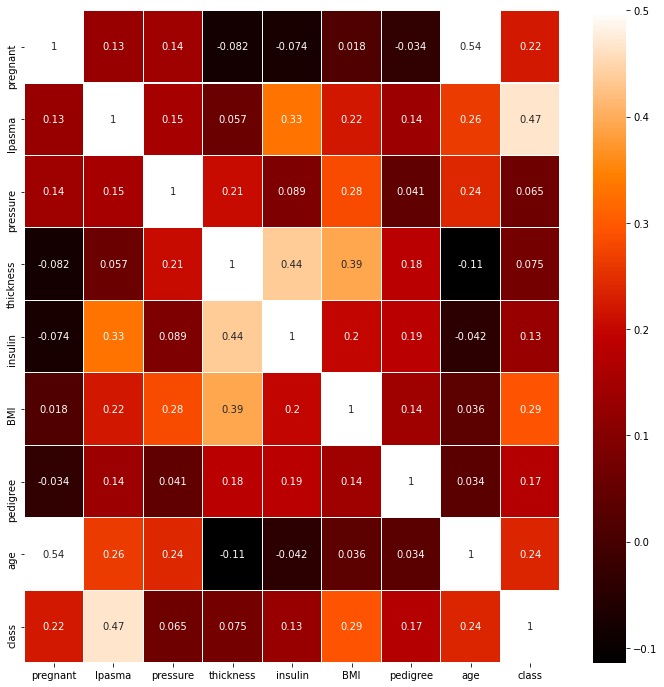

In [10]:
# 데이터 간의 상관관계를 그래프로 표현

colormap = plt.cm.gist_heat    # 그래프의 색상 구성을 정한다
plt.figure(figsize=(12,12))    # 그래프의 크기를 정한다

# 그래프의 속성을 결정한다. vmax의 값을 0.5로 지정해 0.5에 가까울수록 밝은 색으로 표시되게 함
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

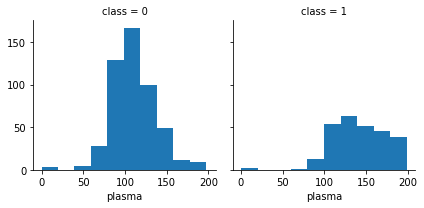

In [17]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

# 4. 딥러닝

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy
import tensorflow as tf

# seed 값 생성
numpy.random.seed(3)
tf.random.set_seed(3)

# 데이터 로드
dataset = numpy.loadtxt(r'C:\Users\Owner\Desktop\khh\SeoulICT\220313\deepLearning_dataset\ThoraricSurgery.csv', delimiter=",")
X = dataset[:, :8]
Y = dataset[:, 8]

# 모델의 설정
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
model.fit(X, Y, epochs=200, batch_size=10)

# 결과 출력
print('\n Accuracy : %.4f'%(model.evaluate(X, Y)[1]))

Epoch 1/200
47/47 [==============================] - 0s 826us/step - loss: 16.7945 - accuracy: 0.3128
Epoch 2/200
47/47 [==============================] - 0s 1ms/step - loss: 2.8538 - accuracy: 0.4702
Epoch 3/200
47/47 [==============================] - 0s 1ms/step - loss: 0.7086 - accuracy: 0.6723
Epoch 4/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6658 - accuracy: 0.6872
Epoch 5/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6547 - accuracy: 0.6851
Epoch 6/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6525 - accuracy: 0.6872
Epoch 7/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6478 - accuracy: 0.6872
Epoch 8/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6589 - accuracy: 0.6702
Epoch 9/200
47/47 [==============================] - 0s 867us/step - loss: 0.6478 - accuracy: 0.6915
Epoch 10/200
47/47 [==============================] - 0s 482us/step - loss: 0.6538 - accuracy: 0.6915
Ep

47/47 [==============================] - 0s 482us/step - loss: 0.3518 - accuracy: 0.8957
Epoch 82/200
47/47 [==============================] - 0s 545us/step - loss: 0.3422 - accuracy: 0.8915
Epoch 83/200
47/47 [==============================] - 0s 520us/step - loss: 0.3386 - accuracy: 0.8915
Epoch 84/200
47/47 [==============================] - 0s 540us/step - loss: 0.3528 - accuracy: 0.8851
Epoch 85/200
47/47 [==============================] - 0s 480us/step - loss: 0.3372 - accuracy: 0.8936
Epoch 86/200
47/47 [==============================] - 0s 499us/step - loss: 0.3494 - accuracy: 0.8915
Epoch 87/200
47/47 [==============================] - 0s 433us/step - loss: 0.3485 - accuracy: 0.8915
Epoch 88/200
47/47 [==============================] - 0s 452us/step - loss: 0.3402 - accuracy: 0.8872
Epoch 89/200
47/47 [==============================] - 0s 490us/step - loss: 0.3440 - accuracy: 0.8936
Epoch 90/200
47/47 [==============================] - 0s 502us/step - loss: 0.3610 - accuracy: 

47/47 [==============================] - 0s 453us/step - loss: 0.3599 - accuracy: 0.8766
Epoch 161/200
47/47 [==============================] - 0s 463us/step - loss: 0.3549 - accuracy: 0.8745
Epoch 162/200
47/47 [==============================] - 0s 458us/step - loss: 0.3343 - accuracy: 0.8851
Epoch 163/200
47/47 [==============================] - 0s 477us/step - loss: 0.3590 - accuracy: 0.8787
Epoch 164/200
47/47 [==============================] - 0s 460us/step - loss: 0.3482 - accuracy: 0.8894
Epoch 165/200
47/47 [==============================] - 0s 435us/step - loss: 0.3261 - accuracy: 0.9000
Epoch 166/200
47/47 [==============================] - 0s 447us/step - loss: 0.3406 - accuracy: 0.8851
Epoch 167/200
47/47 [==============================] - 0s 481us/step - loss: 0.3303 - accuracy: 0.8915
Epoch 168/200
47/47 [==============================] - 0s 478us/step - loss: 0.3337 - accuracy: 0.8957
Epoch 169/200
47/47 [==============================] - 0s 456us/step - loss: 0.3279 - a

# 아이리스 데이터 분석하기
(다중분류 선택)
## 1. 상관관계(그래프)

In [19]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Owner\Desktop\khh\SeoulICT\220313\deepLearning_dataset\iris.csv', names=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


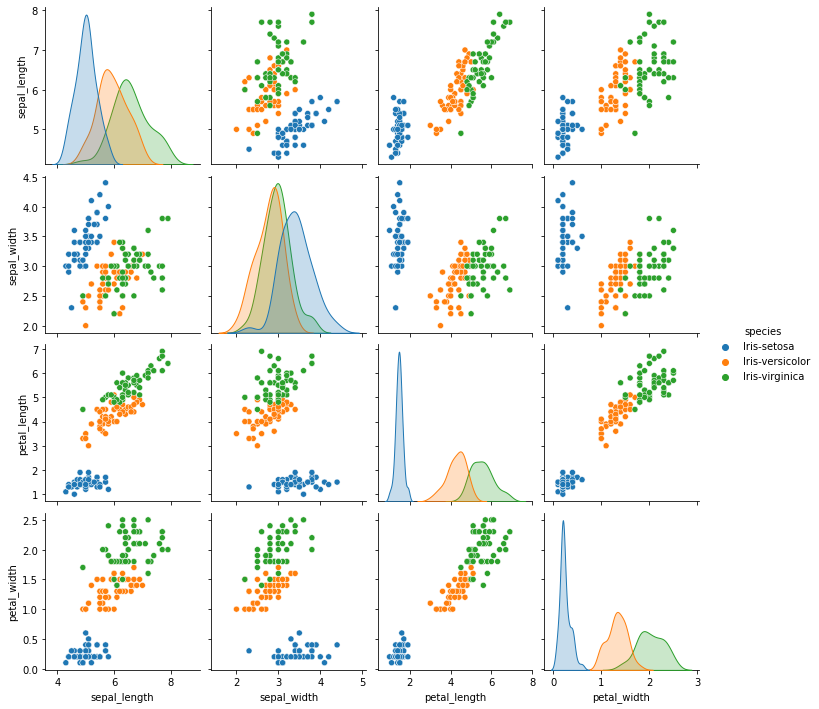

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='species')
plt.show()

## 2. 원-핫 인코딩

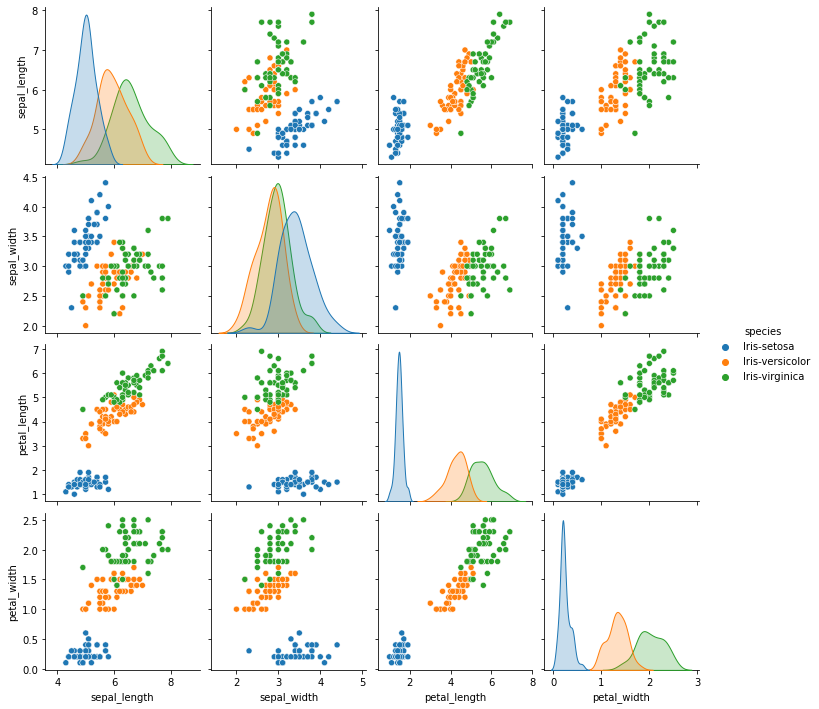

Epoch 1/50
150/150 [==============================] - 0s 661us/step - loss: 1.3259 - accuracy: 0.3333
Epoch 2/50
150/150 [==============================] - 0s 401us/step - loss: 0.8409 - accuracy: 0.6333
Epoch 3/50
150/150 [==============================] - 0s 405us/step - loss: 0.7110 - accuracy: 0.7267
Epoch 4/50
150/150 [==============================] - 0s 410us/step - loss: 0.6229 - accuracy: 0.6867
Epoch 5/50
150/150 [==============================] - 0s 417us/step - loss: 0.5542 - accuracy: 0.7933
Epoch 6/50
150/150 [==============================] - 0s 432us/step - loss: 0.4988 - accuracy: 0.9067
Epoch 7/50
150/150 [==============================] - 0s 414us/step - loss: 0.4562 - accuracy: 0.9133
Epoch 8/50
150/150 [==============================] - 0s 439us/step - loss: 0.4287 - accuracy: 0.9067
Epoch 9/50
150/150 [==============================] - 0s 453us/step - loss: 0.4006 - accuracy: 0.9267
Epoch 10/50
150/150 [==============================] - 0s 461us/step - loss: 0.377

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# seed 값 생성
numpy.random.seed(3)
tf.random.set_seed(3)

# 데이터 입력
df = pd.read_csv(r'C:\Users\Owner\Desktop\khh\SeoulICT\220313\deepLearning_dataset\iris.csv', names=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])

# 그래프로 확인
sns.pairplot(df, hue='species')
plt.show()

# 데이터 분류
dataset = df.values
X = dataset[:, :4].astype(float)
Y_obj = dataset[:, 4]

# 문자열을 숫자로 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y)

# 모델의 설정
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
model.fit(X, Y_encoded, epochs=50, batch_size=1)

# 결과 출력
print('\n Accuracy : %.4f'%(model.evaluate(X, Y_encoded)[1]))

# 초음파 광물 예측(과적합 피하기)
## 1. 데이터 확인

In [25]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Owner\Desktop\khh\SeoulICT\220313\deepLearning_dataset\sonar.csv', header=None)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [26]:
print(df.head())

       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.0095  0.0078   

## 2. 딥러닝

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy
import tensorflow as tf

# seed 값 생성
numpy.random.seed(3)
tf.random.set_seed(3)

# 데이터 입력
df = pd.read_csv(r'C:\Users\Owner\Desktop\khh\SeoulICT\220313\deepLearning_dataset\sonar.csv', header=None)

dataset = df.values
X = dataset[:, :60].astype(float)
Y_obj = dataset[:, 60]

# 문자열 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 모델의 설정
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
model.fit(X, Y, epochs=200, batch_size=5)

# 결과 출력
print('\n Accuracy : %.4f'%(model.evaluate(X, Y)[1]))

Epoch 1/200
42/42 [==============================] - 0s 710us/step - loss: 0.6795 - accuracy: 0.5913
Epoch 2/200
42/42 [==============================] - 0s 592us/step - loss: 0.6517 - accuracy: 0.6250
Epoch 3/200
42/42 [==============================] - 0s 615us/step - loss: 0.6328 - accuracy: 0.6587
Epoch 4/200
42/42 [==============================] - 0s 570us/step - loss: 0.5994 - accuracy: 0.7067
Epoch 5/200
42/42 [==============================] - 0s 536us/step - loss: 0.5664 - accuracy: 0.7644
Epoch 6/200
42/42 [==============================] - 0s 577us/step - loss: 0.5420 - accuracy: 0.7500
Epoch 7/200
42/42 [==============================] - 0s 583us/step - loss: 0.5088 - accuracy: 0.7644
Epoch 8/200
42/42 [==============================] - 0s 540us/step - loss: 0.4829 - accuracy: 0.7740
Epoch 9/200
42/42 [==============================] - 0s 570us/step - loss: 0.4707 - accuracy: 0.7788
Epoch 10/200
42/42 [==============================] - 0s 535us/step - loss: 0.4490 - accura

42/42 [==============================] - 0s 536us/step - loss: 0.1334 - accuracy: 0.9471
Epoch 82/200
42/42 [==============================] - 0s 574us/step - loss: 0.1357 - accuracy: 0.9567
Epoch 83/200
42/42 [==============================] - 0s 535us/step - loss: 0.1252 - accuracy: 0.9615
Epoch 84/200
42/42 [==============================] - 0s 583us/step - loss: 0.1269 - accuracy: 0.9471
Epoch 85/200
42/42 [==============================] - 0s 511us/step - loss: 0.1247 - accuracy: 0.9567
Epoch 86/200
42/42 [==============================] - 0s 508us/step - loss: 0.1225 - accuracy: 0.9567
Epoch 87/200
42/42 [==============================] - 0s 567us/step - loss: 0.1137 - accuracy: 0.9663
Epoch 88/200
42/42 [==============================] - 0s 559us/step - loss: 0.1556 - accuracy: 0.9327
Epoch 89/200
42/42 [==============================] - 0s 610us/step - loss: 0.1131 - accuracy: 0.9712
Epoch 90/200
42/42 [==============================] - 0s 609us/step - loss: 0.1113 - accuracy: 

42/42 [==============================] - 0s 587us/step - loss: 0.0224 - accuracy: 1.0000
Epoch 161/200
42/42 [==============================] - 0s 590us/step - loss: 0.0194 - accuracy: 1.0000
Epoch 162/200
42/42 [==============================] - 0s 587us/step - loss: 0.0185 - accuracy: 0.9952
Epoch 163/200
42/42 [==============================] - 0s 586us/step - loss: 0.0295 - accuracy: 1.0000
Epoch 164/200
42/42 [==============================] - 0s 598us/step - loss: 0.0324 - accuracy: 0.9952
Epoch 165/200
42/42 [==============================] - 0s 615us/step - loss: 0.0188 - accuracy: 1.0000
Epoch 166/200
42/42 [==============================] - 0s 561us/step - loss: 0.0175 - accuracy: 1.0000
Epoch 167/200
42/42 [==============================] - 0s 610us/step - loss: 0.0144 - accuracy: 1.0000
Epoch 168/200
42/42 [==============================] - 0s 559us/step - loss: 0.0187 - accuracy: 1.0000
Epoch 169/200
42/42 [==============================] - 0s 567us/step - loss: 0.0166 - a

In [42]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)
df = pd.read_csv(r'C:\Users\Owner\Desktop\khh\SeoulICT\220313\deepLearning_dataset\sonar.csv', header=None)
dataset = df.values
X = dataset[:, :60].astype(float)
Y_obj = dataset[:, 60]
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 학습셋과 테스트셋의 구분
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=130, batch_size=5)

# 테스트셋에 모델 적용
print('\n Test Accuracy : %.4f'%(model.evaluate(X_test, Y_test)[1]))

Epoch 1/130
29/29 [==============================] - 0s 824us/step - loss: 0.2472 - accuracy: 0.4897
Epoch 2/130
29/29 [==============================] - 0s 1ms/step - loss: 0.2317 - accuracy: 0.6414
Epoch 3/130
29/29 [==============================] - 0s 1ms/step - loss: 0.2241 - accuracy: 0.6207
Epoch 4/130
29/29 [==============================] - 0s 1ms/step - loss: 0.2139 - accuracy: 0.6897
Epoch 5/130
29/29 [==============================] - 0s 1ms/step - loss: 0.2034 - accuracy: 0.7379
Epoch 6/130
29/29 [==============================] - 0s 1ms/step - loss: 0.1925 - accuracy: 0.7517
Epoch 7/130
29/29 [==============================] - 0s 1ms/step - loss: 0.1819 - accuracy: 0.7517
Epoch 8/130
29/29 [==============================] - 0s 1ms/step - loss: 0.1729 - accuracy: 0.8069
Epoch 9/130
29/29 [==============================] - 0s 2ms/step - loss: 0.1650 - accuracy: 0.7862
Epoch 10/130
29/29 [==============================] - 0s 1ms/step - loss: 0.1618 - accuracy: 0.8069
Epoch 1

29/29 [==============================] - 0s 498us/step - loss: 0.0100 - accuracy: 1.0000
Epoch 82/130
29/29 [==============================] - 0s 503us/step - loss: 0.0115 - accuracy: 1.0000
Epoch 83/130
29/29 [==============================] - 0s 463us/step - loss: 0.0107 - accuracy: 1.0000
Epoch 84/130
29/29 [==============================] - 0s 527us/step - loss: 0.0100 - accuracy: 1.0000
Epoch 85/130
29/29 [==============================] - 0s 428us/step - loss: 0.0080 - accuracy: 1.0000
Epoch 86/130
29/29 [==============================] - 0s 505us/step - loss: 0.0073 - accuracy: 1.0000
Epoch 87/130
29/29 [==============================] - 0s 485us/step - loss: 0.0073 - accuracy: 1.0000
Epoch 88/130
29/29 [==============================] - 0s 476us/step - loss: 0.0079 - accuracy: 1.0000
Epoch 89/130
29/29 [==============================] - 0s 468us/step - loss: 0.0067 - accuracy: 1.0000
Epoch 90/130
29/29 [==============================] - 0s 525us/step - loss: 0.0074 - accuracy: 

## 과적합 피하기 : 교차검증

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

import pandas as pd
import numpy
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

df = pd.read_csv(r'C:\Users\Owner\Desktop\khh\SeoulICT\220313\deepLearning_dataset\sonar.csv', header=None)

dataset = df.values
X = dataset[:, 0:60].astype(float)    # astype(float) 이거 없으면 동작 안된다
# Failed to convert a NumPy array to a Tensor (Unsupported object type float) 이 에러 나옴
Y_obj = dataset[:, 60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 10개의 파일로 쪼갬
n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

# 빈 accuracy 배열
accuracy = []

# 모델의 설정, 컴파일, 실행
for train, test in skf.split(X, Y):
    model = Sequential()
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

    model.fit(X[train], Y[train], epochs=100, batch_size=5)
    k_accuracy = "%.4f" % (model.evaluate(X[test], Y[test])[1])
    accuracy.append(k_accuracy)
    
# 결과 출력
print('\n %.f fold accuracy :'%n_fold, accuracy)

Epoch 1/100
38/38 [==============================] - 0s 891us/step - loss: 0.2416 - accuracy: 0.5455
Epoch 2/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2247 - accuracy: 0.6310
Epoch 3/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2116 - accuracy: 0.6578
Epoch 4/100
38/38 [==============================] - 0s 675us/step - loss: 0.1984 - accuracy: 0.7219
Epoch 5/100
38/38 [==============================] - 0s 574us/step - loss: 0.1840 - accuracy: 0.7754
Epoch 6/100
38/38 [==============================] - 0s 568us/step - loss: 0.1699 - accuracy: 0.7861
Epoch 7/100
38/38 [==============================] - 0s 593us/step - loss: 0.1623 - accuracy: 0.7861
Epoch 8/100
38/38 [==============================] - 0s 589us/step - loss: 0.1511 - accuracy: 0.8021
Epoch 9/100
38/38 [==============================] - 0s 620us/step - loss: 0.1432 - accuracy: 0.8021
Epoch 10/100
38/38 [==============================] - 0s 593us/step - loss: 0.1347 - accuracy: 

38/38 [==============================] - 0s 539us/step - loss: 0.0167 - accuracy: 0.9893
Epoch 82/100
38/38 [==============================] - 0s 486us/step - loss: 0.0170 - accuracy: 0.9947
Epoch 83/100
38/38 [==============================] - 0s 513us/step - loss: 0.0118 - accuracy: 1.0000
Epoch 84/100
38/38 [==============================] - 0s 510us/step - loss: 0.0111 - accuracy: 0.9947
Epoch 85/100
38/38 [==============================] - 0s 530us/step - loss: 0.0251 - accuracy: 0.9840
Epoch 86/100
38/38 [==============================] - 0s 483us/step - loss: 0.0236 - accuracy: 0.9786
Epoch 87/100
38/38 [==============================] - 0s 520us/step - loss: 0.0161 - accuracy: 0.9947
Epoch 88/100
38/38 [==============================] - 0s 512us/step - loss: 0.0111 - accuracy: 0.9947
Epoch 89/100
38/38 [==============================] - 0s 512us/step - loss: 0.0098 - accuracy: 1.0000
Epoch 90/100
38/38 [==============================] - 0s 521us/step - loss: 0.0096 - accuracy: 

38/38 [==============================] - 0s 486us/step - loss: 0.0634 - accuracy: 0.9358
Epoch 54/100
38/38 [==============================] - 0s 582us/step - loss: 0.0625 - accuracy: 0.9358
Epoch 55/100
38/38 [==============================] - 0s 487us/step - loss: 0.0644 - accuracy: 0.9251
Epoch 56/100
38/38 [==============================] - 0s 495us/step - loss: 0.0614 - accuracy: 0.9465
Epoch 57/100
38/38 [==============================] - 0s 512us/step - loss: 0.0614 - accuracy: 0.9251
Epoch 58/100
38/38 [==============================] - 0s 485us/step - loss: 0.0573 - accuracy: 0.9465
Epoch 59/100
38/38 [==============================] - 0s 497us/step - loss: 0.0571 - accuracy: 0.9465
Epoch 60/100
38/38 [==============================] - 0s 490us/step - loss: 0.0541 - accuracy: 0.9519
Epoch 61/100
38/38 [==============================] - 0s 486us/step - loss: 0.0551 - accuracy: 0.9251
Epoch 62/100
38/38 [==============================] - 0s 540us/step - loss: 0.0516 - accuracy: 

38/38 [==============================] - 0s 539us/step - loss: 0.1198 - accuracy: 0.8342
Epoch 26/100
38/38 [==============================] - 0s 550us/step - loss: 0.1180 - accuracy: 0.8396
Epoch 27/100
38/38 [==============================] - 0s 529us/step - loss: 0.1146 - accuracy: 0.8770
Epoch 28/100
38/38 [==============================] - 0s 578us/step - loss: 0.1129 - accuracy: 0.8717
Epoch 29/100
38/38 [==============================] - 0s 539us/step - loss: 0.1099 - accuracy: 0.8663
Epoch 30/100
38/38 [==============================] - 0s 488us/step - loss: 0.1082 - accuracy: 0.8503
Epoch 31/100
38/38 [==============================] - 0s 493us/step - loss: 0.1052 - accuracy: 0.8824
Epoch 32/100
38/38 [==============================] - 0s 512us/step - loss: 0.1085 - accuracy: 0.8770
Epoch 33/100
38/38 [==============================] - 0s 511us/step - loss: 0.1038 - accuracy: 0.8610
Epoch 34/100
38/38 [==============================] - 0s 467us/step - loss: 0.1000 - accuracy: 

38/38 [==============================] - 0s 513us/step - loss: 0.2314 - accuracy: 0.6150
Epoch 5/100
38/38 [==============================] - 0s 585us/step - loss: 0.2246 - accuracy: 0.6738
Epoch 6/100
38/38 [==============================] - 0s 496us/step - loss: 0.2189 - accuracy: 0.6845
Epoch 7/100
38/38 [==============================] - 0s 512us/step - loss: 0.2131 - accuracy: 0.6898
Epoch 8/100
38/38 [==============================] - 0s 490us/step - loss: 0.2066 - accuracy: 0.7219
Epoch 9/100
38/38 [==============================] - 0s 512us/step - loss: 0.1981 - accuracy: 0.7005
Epoch 10/100
38/38 [==============================] - 0s 513us/step - loss: 0.1901 - accuracy: 0.8021
Epoch 11/100
38/38 [==============================] - 0s 540us/step - loss: 0.1873 - accuracy: 0.7433
Epoch 12/100
38/38 [==============================] - 0s 486us/step - loss: 0.1777 - accuracy: 0.7219
Epoch 13/100
38/38 [==============================] - 0s 503us/step - loss: 0.1752 - accuracy: 0.780

38/38 [==============================] - 0s 532us/step - loss: 0.0323 - accuracy: 0.9733
Epoch 85/100
38/38 [==============================] - 0s 593us/step - loss: 0.0332 - accuracy: 0.9786
Epoch 86/100
38/38 [==============================] - 0s 529us/step - loss: 0.0303 - accuracy: 0.9840
Epoch 87/100
38/38 [==============================] - 0s 514us/step - loss: 0.0306 - accuracy: 0.9786
Epoch 88/100
38/38 [==============================] - 0s 485us/step - loss: 0.0302 - accuracy: 0.9786
Epoch 89/100
38/38 [==============================] - 0s 516us/step - loss: 0.0312 - accuracy: 0.9679
Epoch 90/100
38/38 [==============================] - 0s 527us/step - loss: 0.0367 - accuracy: 0.9733
Epoch 91/100
38/38 [==============================] - 0s 553us/step - loss: 0.0266 - accuracy: 0.9840
Epoch 92/100
38/38 [==============================] - 0s 541us/step - loss: 0.0273 - accuracy: 0.9840
Epoch 93/100
38/38 [==============================] - 0s 514us/step - loss: 0.0264 - accuracy: 

38/38 [==============================] - 0s 543us/step - loss: 0.0644 - accuracy: 0.9251
Epoch 64/100
38/38 [==============================] - 0s 489us/step - loss: 0.0631 - accuracy: 0.9412
Epoch 65/100
38/38 [==============================] - 0s 528us/step - loss: 0.0620 - accuracy: 0.9305
Epoch 66/100
38/38 [==============================] - 0s 488us/step - loss: 0.0568 - accuracy: 0.9358
Epoch 67/100
38/38 [==============================] - 0s 542us/step - loss: 0.0629 - accuracy: 0.9412
Epoch 68/100
38/38 [==============================] - 0s 513us/step - loss: 0.0562 - accuracy: 0.9465
Epoch 69/100
38/38 [==============================] - 0s 526us/step - loss: 0.0537 - accuracy: 0.9465
Epoch 70/100
38/38 [==============================] - 0s 518us/step - loss: 0.0554 - accuracy: 0.9358
Epoch 71/100
38/38 [==============================] - 0s 512us/step - loss: 0.0569 - accuracy: 0.9412
Epoch 72/100
38/38 [==============================] - 0s 485us/step - loss: 0.0494 - accuracy: 

38/38 [==============================] - 0s 513us/step - loss: 0.0947 - accuracy: 0.8824
Epoch 43/100
38/38 [==============================] - 0s 512us/step - loss: 0.0933 - accuracy: 0.9037
Epoch 44/100
38/38 [==============================] - 0s 485us/step - loss: 0.0923 - accuracy: 0.8824
Epoch 45/100
38/38 [==============================] - 0s 486us/step - loss: 0.0904 - accuracy: 0.8824
Epoch 46/100
38/38 [==============================] - 0s 476us/step - loss: 0.0944 - accuracy: 0.8877
Epoch 47/100
38/38 [==============================] - 0s 518us/step - loss: 0.0968 - accuracy: 0.8663
Epoch 48/100
38/38 [==============================] - 0s 489us/step - loss: 0.0890 - accuracy: 0.8877
Epoch 49/100
38/38 [==============================] - 0s 485us/step - loss: 0.0878 - accuracy: 0.8877
Epoch 50/100
38/38 [==============================] - 0s 514us/step - loss: 0.0922 - accuracy: 0.8877
Epoch 51/100
38/38 [==============================] - 0s 483us/step - loss: 0.0831 - accuracy: 

38/38 [==============================] - 0s 487us/step - loss: 0.1071 - accuracy: 0.8717
Epoch 22/100
38/38 [==============================] - 0s 514us/step - loss: 0.1139 - accuracy: 0.8235
Epoch 23/100
38/38 [==============================] - 0s 487us/step - loss: 0.1032 - accuracy: 0.8824
Epoch 24/100
38/38 [==============================] - 0s 485us/step - loss: 0.1049 - accuracy: 0.8717
Epoch 25/100
38/38 [==============================] - 0s 485us/step - loss: 0.0931 - accuracy: 0.8824
Epoch 26/100
38/38 [==============================] - 0s 540us/step - loss: 0.0917 - accuracy: 0.8930
Epoch 27/100
38/38 [==============================] - 0s 513us/step - loss: 0.1032 - accuracy: 0.8663
Epoch 28/100
38/38 [==============================] - 0s 501us/step - loss: 0.0904 - accuracy: 0.8824
Epoch 29/100
38/38 [==============================] - 0s 592us/step - loss: 0.0815 - accuracy: 0.9251
Epoch 30/100
38/38 [==============================] - 0s 488us/step - loss: 0.0826 - accuracy: 

1/1 [==============================] - 0s 64ms/step - loss: 0.0888 - accuracy: 0.8571
Epoch 1/100
38/38 [==============================] - 0s 778us/step - loss: 0.2409 - accuracy: 0.5455
Epoch 2/100
38/38 [==============================] - 0s 667us/step - loss: 0.2277 - accuracy: 0.6150
Epoch 3/100
38/38 [==============================] - 0s 542us/step - loss: 0.2176 - accuracy: 0.6578
Epoch 4/100
38/38 [==============================] - 0s 487us/step - loss: 0.2103 - accuracy: 0.7112
Epoch 5/100
38/38 [==============================] - 0s 541us/step - loss: 0.2018 - accuracy: 0.7433
Epoch 6/100
38/38 [==============================] - 0s 497us/step - loss: 0.1906 - accuracy: 0.7326
Epoch 7/100
38/38 [==============================] - 0s 494us/step - loss: 0.1830 - accuracy: 0.7487
Epoch 8/100
38/38 [==============================] - 0s 637us/step - loss: 0.1735 - accuracy: 0.7701
Epoch 9/100
38/38 [==============================] - 0s 513us/step - loss: 0.1657 - accuracy: 0.7807
Epoch

38/38 [==============================] - 0s 528us/step - loss: 0.0404 - accuracy: 0.9626
Epoch 81/100
38/38 [==============================] - 0s 484us/step - loss: 0.0412 - accuracy: 0.9679
Epoch 82/100
38/38 [==============================] - 0s 492us/step - loss: 0.0402 - accuracy: 0.9626
Epoch 83/100
38/38 [==============================] - 0s 599us/step - loss: 0.0395 - accuracy: 0.9572
Epoch 84/100
38/38 [==============================] - 0s 510us/step - loss: 0.0398 - accuracy: 0.9626
Epoch 85/100
38/38 [==============================] - 0s 566us/step - loss: 0.0432 - accuracy: 0.9519
Epoch 86/100
38/38 [==============================] - 0s 489us/step - loss: 0.0412 - accuracy: 0.9626
Epoch 87/100
38/38 [==============================] - 0s 489us/step - loss: 0.0376 - accuracy: 0.9626
Epoch 88/100
38/38 [==============================] - 0s 525us/step - loss: 0.0430 - accuracy: 0.9519
Epoch 89/100
38/38 [==============================] - 0s 573us/step - loss: 0.0374 - accuracy: 

38/38 [==============================] - 0s 573us/step - loss: 0.0674 - accuracy: 0.9202
Epoch 60/100
38/38 [==============================] - 0s 486us/step - loss: 0.0725 - accuracy: 0.9202
Epoch 61/100
38/38 [==============================] - 0s 520us/step - loss: 0.0644 - accuracy: 0.9309
Epoch 62/100
38/38 [==============================] - 0s 485us/step - loss: 0.0652 - accuracy: 0.9202
Epoch 63/100
38/38 [==============================] - 0s 489us/step - loss: 0.0624 - accuracy: 0.9362
Epoch 64/100
38/38 [==============================] - 0s 521us/step - loss: 0.0616 - accuracy: 0.9362
Epoch 65/100
38/38 [==============================] - 0s 487us/step - loss: 0.0591 - accuracy: 0.9468
Epoch 66/100
38/38 [==============================] - 0s 498us/step - loss: 0.0614 - accuracy: 0.9309
Epoch 67/100
38/38 [==============================] - 0s 488us/step - loss: 0.0571 - accuracy: 0.9415
Epoch 68/100
38/38 [==============================] - 0s 501us/step - loss: 0.0567 - accuracy: 

38/38 [==============================] - 0s 537us/step - loss: 0.0885 - accuracy: 0.9043
Epoch 39/100
38/38 [==============================] - 0s 490us/step - loss: 0.0918 - accuracy: 0.8989
Epoch 40/100
38/38 [==============================] - 0s 543us/step - loss: 0.0848 - accuracy: 0.9149
Epoch 41/100
38/38 [==============================] - 0s 543us/step - loss: 0.0869 - accuracy: 0.8936
Epoch 42/100
38/38 [==============================] - 0s 519us/step - loss: 0.0805 - accuracy: 0.9149
Epoch 43/100
38/38 [==============================] - 0s 530us/step - loss: 0.0796 - accuracy: 0.9149
Epoch 44/100
38/38 [==============================] - 0s 488us/step - loss: 0.0792 - accuracy: 0.9202
Epoch 45/100
38/38 [==============================] - 0s 516us/step - loss: 0.0754 - accuracy: 0.9309
Epoch 46/100
38/38 [==============================] - 0s 513us/step - loss: 0.0744 - accuracy: 0.9255
Epoch 47/100
38/38 [==============================] - 0s 512us/step - loss: 0.0723 - accuracy: 